In [1]:
import edhec_risk_kit as erk
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 180
mpl.rcParams['figure.figsize'] = (9, 4)
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

In [2]:
ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":].cov()

In [3]:
def msr(riskfree_rate, er, cov):
    """
    Risk Free Rate -> Weight Vector
    """
    n = len(er)

    init_guess = np.repeat(1/n, n)

    # constrain to no leverage, and no short positions
    bounds = ((0, 1),)*n  # multiplying a tuple makes n copies of it

    # constraint that weights need to equal 1
    weights_sum_to_1 = {
        'type': 'eq',
        # check (sum of weights) - 1 equals 0
        'fun': lambda weights: np.sum(weights) - 1
    }

    # neg sharpe ratio
    def neg_sharpe_ratio(weights, riskfree_rate, er, cov):
        """
        Returns the negative of the sharpe ratio, given weights
        """
        r = erk.portfolio_returns(weights, er)
        vol = erk.portfolio_vol(weights, cov)
        return -(r-riskfree_rate)/vol

    results = minimize(neg_sharpe_ratio, init_guess,
                       args=(riskfree_rate, er, cov), method="SLSQP",
                       constraints=(weights_sum_to_1),
                       bounds=bounds)  # can pass arg: options = {'disp':False}
    return results.x

(0.0, 0.13662326236318145)

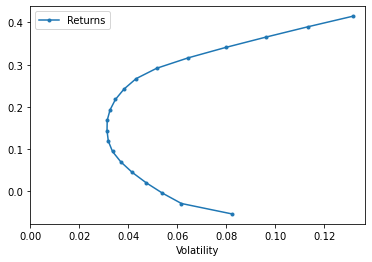

In [4]:
ax = erk.plot_ef(20,er,cov)
ax.set_xlim(left = 0)

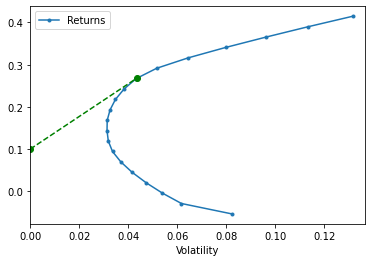

In [5]:
ax = erk.plot_ef(20,er,cov)
ax.set_xlim(left = 0)
rf = 0.1
w_msr = msr(rf,er,cov)
r_msr = erk.portfolio_returns(w_msr, er)
vol_msr = erk.portfolio_vol(w_msr, cov)

# Add Capital Markets Line
cml_x = [0, vol_msr]
cml_y = [rf,r_msr]
ax.plot(cml_x, cml_y, color = 'green', marker = "o", linestyle = 'dashed')

<AxesSubplot:xlabel='Volatility'>

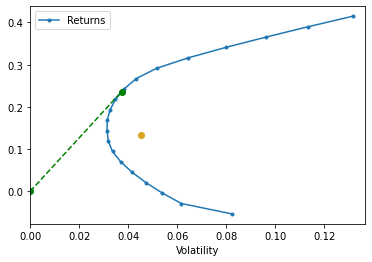

In [6]:
erk.plot_ef(20,er,cov,True,0.01)